# Building Classes

## Defining Your Own Classes

### Example: A Consumer Class

Build a class with:

- Wealth
- Earn method: Increments consumer's wealth by y
- Spend method: decreses wealth by x and returns error if insuffiecient funds

In [1]:
# Name class
class Consumer:
    
    #define wealth attribute
    def __init__(self, w):
        "Initialize consumer with w pounds of wealth"
        self.wealth = w
        
    #define the earn method
    def earn(self, y):
        "The consumer earns y pounds"
        self.wealth += y
        
    #define spend method
    def spend(self, x):
        "The consumer spends x pounds if feasible"
        new_wealth = self.wealth - x
        if new_wealth < 0:
            print("Insufficient funds")
        else:
            self.wealth = new_wealth

In [2]:
c1 = Consumer(10)
c1.spend(5)
c1.wealth

5

In [3]:
c1.earn(15)
c1.spend(100)

Insufficient funds


In [4]:
#Can create multiple instances each with its own data
c1 = Consumer(10)
c2 = Consumer(12)
c2.spend(4)
c2.wealth

8

In [5]:
c1.wealth

10

Each instance stores its data in a separate namespace dictionary

In [6]:
c1.__dict__

{'wealth': 10}

In [7]:
c2.__dict__

{'wealth': 8}

Methods live inside a class object formed when the interpreter reads the class definition

In [8]:
print(Consumer.__dict__)

{'__module__': '__main__', '__init__': <function Consumer.__init__ at 0x000001095B7CD1F8>, 'earn': <function Consumer.earn at 0x000001095B7CD288>, 'spend': <function Consumer.spend at 0x000001095B7CD318>, '__dict__': <attribute '__dict__' of 'Consumer' objects>, '__weakref__': <attribute '__weakref__' of 'Consumer' objects>, '__doc__': None}


c1.earn(10) and Consumer.earn(c2, 10) are equivalent

### Example: The Solow Growth Model

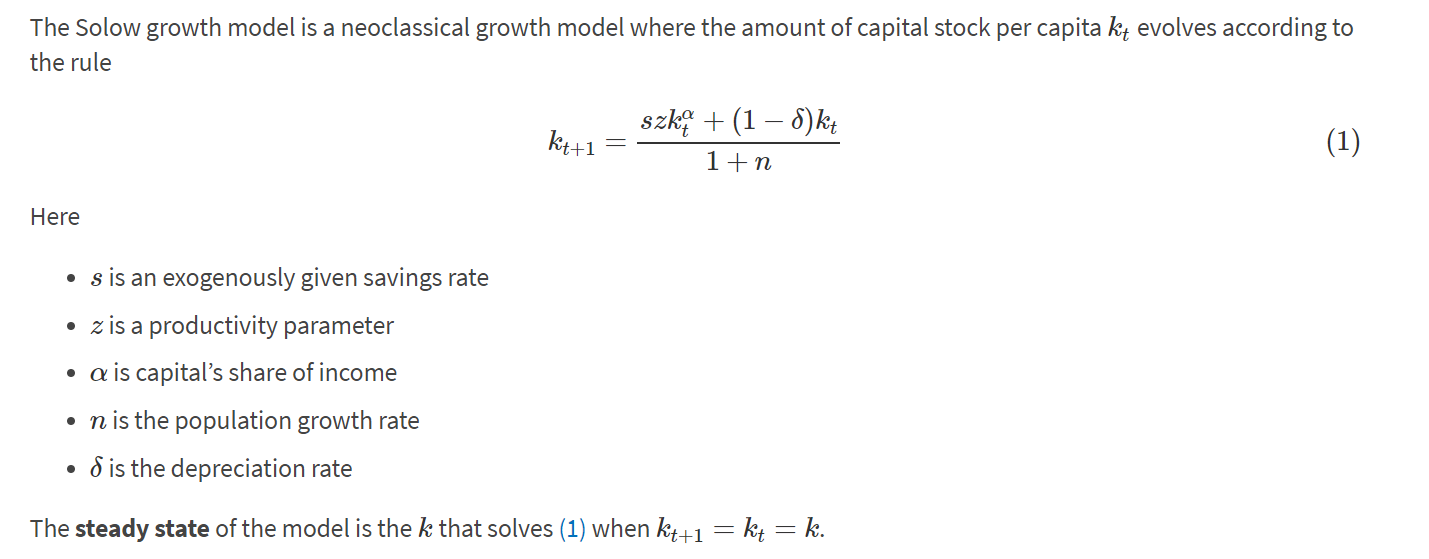

Some points of interest in the code are:

- An instance maintains a record of its current capital stock in the variable self.k.
- The h method implements the right-hand side of (1).
-The update method uses h to update capital as per (1).
    -Notice how inside update the reference to the local method h is self.h.

The methods steady_state and generate_sequence are fairly self-explanatory

In [9]:
class Solow:
    r"""
    Implements the Solow growth model with the update rule

        k_{t+1} = [(s z k^α_t) + (1 - δ)k_t] /(1 + n)

    """
    def __init__(self, n=0.05,  # population growth rate
                       s=0.25,  # savings rate
                       δ=0.1,   # depreciation rate
                       α=0.3,   # share of labor
                       z=2.0,   # productivity
                       k=1.0):  # current capital stock

        self.n, self.s, self.δ, self.α, self.z = n, s, δ, α, z
        self.k = k

    def h(self):
        "Evaluate the h function"
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Apply the update rule
        return (s * z * self.k**α + (1 - δ) * self.k) / (1 + n)

    def update(self):
        "Update the current state (i.e., the capital stock)."
        self.k =  self.h()

    def steady_state(self):
        "Compute the steady state value of capital."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Compute and return steady state
        return ((s * z) / (n + δ))**(1 / (1 - α))

    def generate_sequence(self, t):
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path

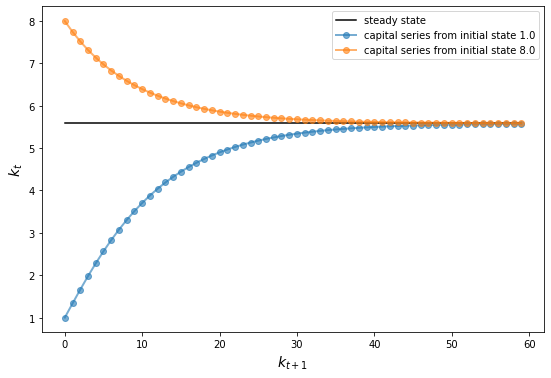

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
s1 = Solow()
s2 = Solow(k=8.0)

T = 60
fig, ax = plt.subplots(figsize=(9, 6))

# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')

# Plot time series for each economy
for s in s1, s2:
    lb = f'capital series from initial state {s.k}'
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)

ax.set_xlabel('$k_{t+1}$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()

### Exercise 1

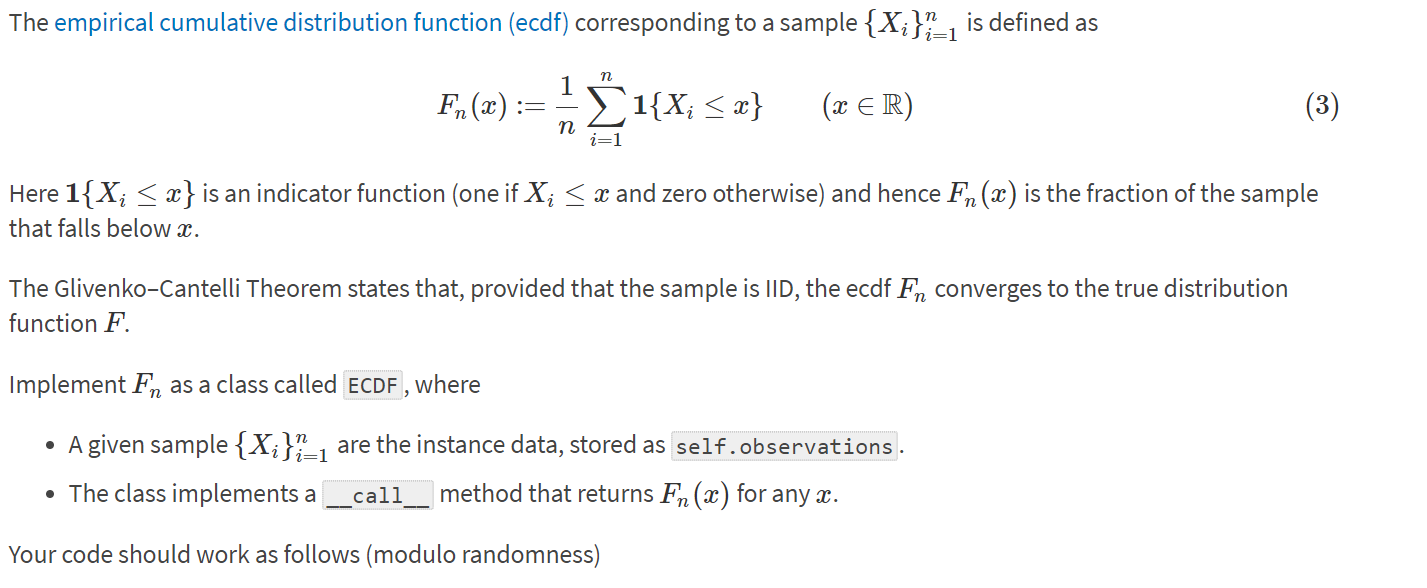

In [21]:
#set up modulo randomness
from random import uniform

samples = [uniform(0, 1) for i in range(10)]

#define class
class ECDF:
    
    def __init__(self, observations):
        self.observations = observations

    #define the function in a call method. Returns F(x) for any x
    
    def __call__(self, x):
        counter = 0.0
        for obs in self.observations:
            if obs <= x:
                counter+=1
                return counter/len(self.observations)
            


In [23]:
samples = [uniform(0, 1) for i in range(10)]
F = ECDF(samples)

print(F(0.5))

F.observations = [uniform(0, 1) for i in range(1000)]

print(F(0.5))

0.1
0.001
